# Jupyter notebook sample

In [19]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
#pip install yfinance
import yfinance as yf

In [4]:
import pandas as pd

data = [
    {"降息周期开始": "1984-10", "背景": "通胀缓解", "3个月标普500表现": "+5%", "12个月表现": "+19%"},
    {"降息周期开始": "1989-06", "背景": "经济放缓", "3个月标普500表现": "-3%", "12个月表现": "-7%"},
    {"降息周期开始": "1995-07", "背景": "软着陆", "3个月标普500表现": "+7%", "12个月表现": "+27%"},
    {"降息周期开始": "1998-09", "背景": "亚洲金融危机", "3个月标普500表现": "+14%", "12个月表现": "+21%"},
    {"降息周期开始": "2001-01", "背景": "互联网泡沫破裂", "3个月标普500表现": "-10%", "12个月表现": "-13%"},
    {"降息周期开始": "2007-09", "背景": "金融危机前奏", "3个月标普500表现": "-8%", "12个月表现": "-37%"},
    {"降息周期开始": "2019-07", "背景": "预防性降息", "3个月标普500表现": "+3%", "12个月表现": "+9%"},
    {"降息周期开始": "2020-03", "背景": "新冠疫情", "3个月标普500表现": "+20%", "12个月表现": "+38%"},
]

df = pd.DataFrame(data)
print(df)


    降息周期开始       背景 3个月标普500表现 12个月表现
0  1984-10     通胀缓解        +5%   +19%
1  1989-06     经济放缓        -3%    -7%
2  1995-07      软着陆        +7%   +27%
3  1998-09   亚洲金融危机       +14%   +21%
4  2001-01  互联网泡沫破裂       -10%   -13%
5  2007-09   金融危机前奏        -8%   -37%
6  2019-07    预防性降息        +3%    +9%
7  2020-03     新冠疫情       +20%   +38%


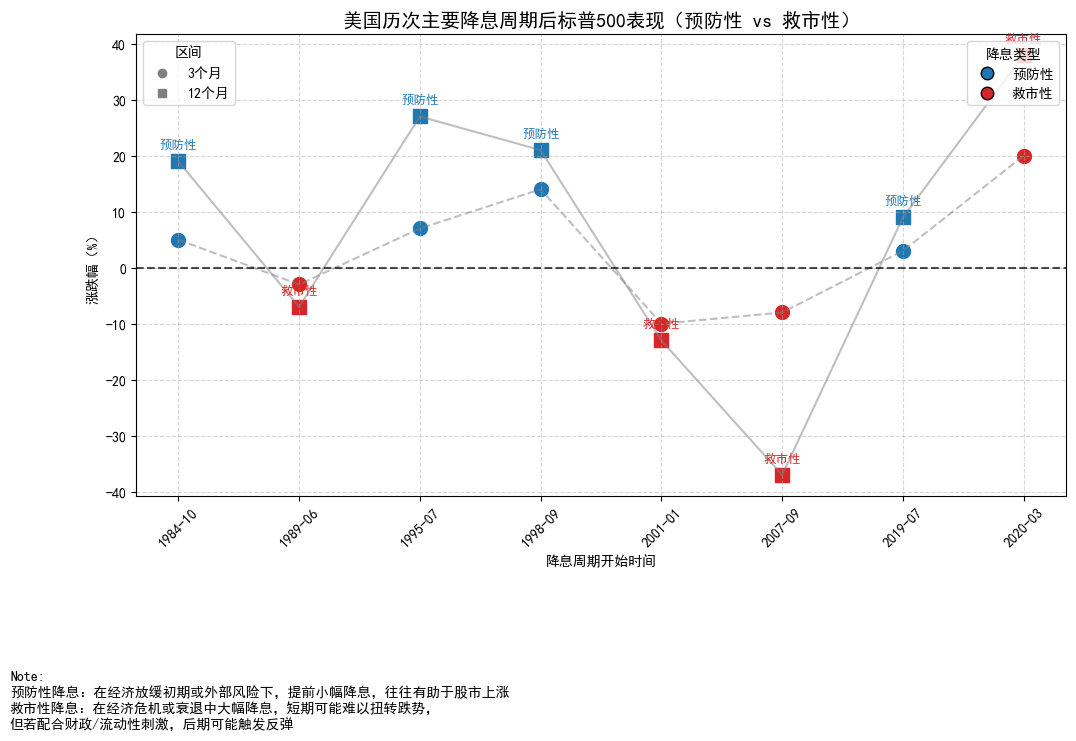

In [37]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

# 模拟 set_chinese_font()
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

# 数据
data = [
    {"降息周期开始": "1984-10", "背景": "通胀缓解", "3个月标普500表现": "+5%", "12个月表现": "+19%", "降息类型": "预防性"},
    {"降息周期开始": "1989-06", "背景": "经济放缓", "3个月标普500表现": "-3%", "12个月表现": "-7%", "降息类型": "救市性"},
    {"降息周期开始": "1995-07", "背景": "软着陆", "3个月标普500表现": "+7%", "12个月表现": "+27%", "降息类型": "预防性"},
    {"降息周期开始": "1998-09", "背景": "亚洲金融危机", "3个月标普500表现": "+14%", "12个月表现": "+21%", "降息类型": "预防性"},
    {"降息周期开始": "2001-01", "背景": "互联网泡沫破裂", "3个月标普500表现": "-10%", "12个月表现": "-13%", "降息类型": "救市性"},
    {"降息周期开始": "2007-09", "背景": "金融危机前奏", "3个月标普500表现": "-8%", "12个月表现": "-37%", "降息类型": "救市性"},
    {"降息周期开始": "2019-07", "背景": "预防性降息", "3个月标普500表现": "+3%", "12个月表现": "+9%", "降息类型": "预防性"},
    {"降息周期开始": "2020-03", "背景": "新冠疫情", "3个月标普500表现": "+20%", "12个月表现": "+38%", "降息类型": "救市性"},
]

df_num = pd.DataFrame(data)
df_num["3个月标普500表现"] = df_num["3个月标普500表现"].str.replace("%", "").astype(float)
df_num["12个月表现"] = df_num["12个月表现"].str.replace("%", "").astype(float)

# 颜色映射
color_map = {"预防性": "tab:blue", "救市性": "tab:red"}

plt.figure(figsize=(12, 6))

# 画3个月表现 (圆点)
for i, row in df_num.iterrows():
    plt.scatter(row["降息周期开始"], row["3个月标普500表现"],
                color=color_map[row["降息类型"]], marker='o', s=100)

# 画12个月表现 (方块)
for i, row in df_num.iterrows():
    plt.scatter(row["降息周期开始"], row["12个月表现"],
                color=color_map[row["降息类型"]], marker='s', s=100)

# 连线
plt.plot(df_num["降息周期开始"], df_num["3个月标普500表现"], linestyle='--', color='gray', alpha=0.5)
plt.plot(df_num["降息周期开始"], df_num["12个月表现"], linestyle='-', color='gray', alpha=0.5)

plt.title("美国历次主要降息周期后标普500表现（预防性 vs 救市性）", fontsize=14)
plt.xlabel("降息周期开始时间")
plt.ylabel("涨跌幅（%）")
plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)

# 图例1：区间（形状）
legend_series = [
    Line2D([0], [0], marker='o', color='gray', label='3个月', linestyle="None"),
    Line2D([0], [0], marker='s', color='gray', label='12个月', linestyle="None"),
]
leg1 = plt.legend(handles=legend_series, title="区间", loc="upper left")
plt.gca().add_artist(leg1)

# 图例2：降息类型（颜色）
legend_kind = [
    Line2D([0], [0], marker='o', color='none', label='预防性', markerfacecolor=color_map["预防性"], markersize=9),
    Line2D([0], [0], marker='o', color='none', label='救市性', markerfacecolor=color_map["救市性"], markersize=9),
]
plt.legend(handles=legend_kind, title="降息类型", loc="upper right")

# 标注
for i, row in df_num.iterrows():
    plt.text(row["降息周期开始"], row["12个月表现"]+2, row["降息类型"],
             ha='center', va='bottom', fontsize=9, color=color_map[row["降息类型"]])

# 添加说明 Note
note_text = (
    "Note:\n"
    "预防性降息：在经济放缓初期或外部风险下，提前小幅降息，往往有助于股市上涨\n"
    "救市性降息：在经济危机或衰退中大幅降息，短期可能难以扭转跌势，\n"
    "但若配合财政/流动性刺激，后期可能触发反弹"
)
plt.gcf().text(0.02, -0.18, note_text, ha="left", va="top", fontsize=10, color="black")

plt.show()


# Plot for QQQ

已设置中文字体: Microsoft YaHei
结果表：
    降息周期开始 降息类型      背景  3个月QQQ表现(%)  12个月QQQ表现(%)
2001-01-02  救市性 互联网泡沫破裂        -30.0         -24.9
2007-09-04  救市性  金融危机前奏          2.0         -11.8
2019-07-01  预防性   预防性降息         -0.9          33.4
2020-03-02  救市性 新冠疫情/救市          9.1          48.0


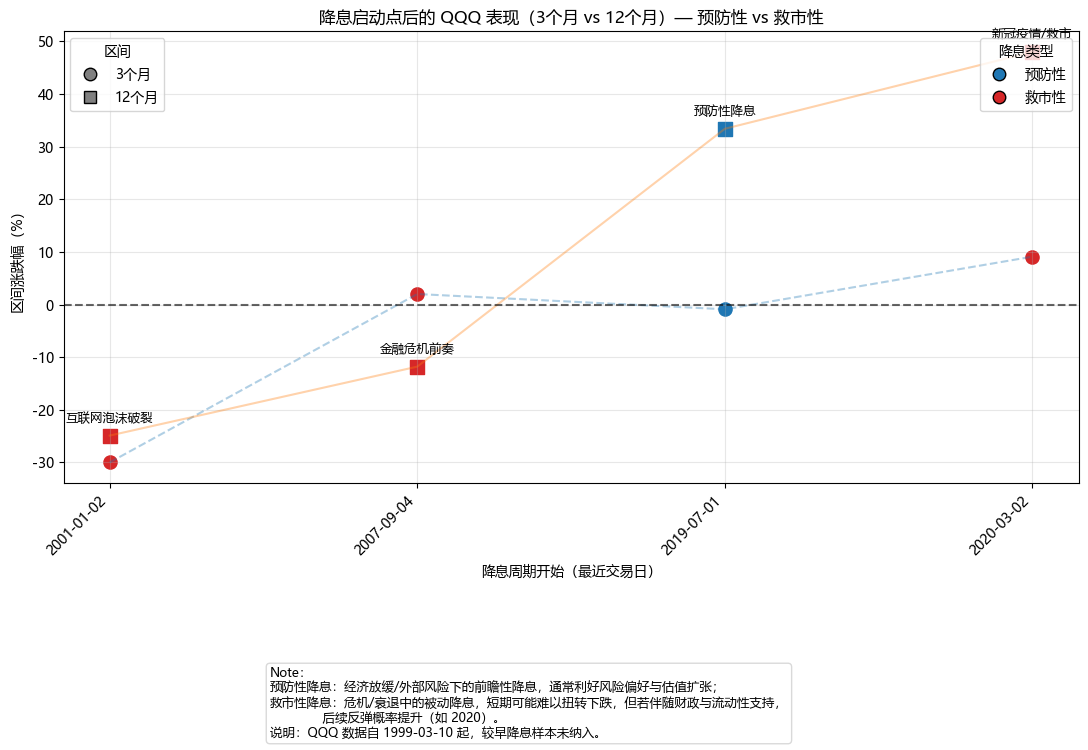

In [34]:
# -*- coding: utf-8 -*-
"""
降息启动点后的 QQQ 表现（3个月、12个月）— 预防性 vs 救市性（兼容 yfinance 新行为 + MultiIndex）
Requires: pandas, matplotlib, yfinance
"""

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import font_manager
import matplotlib as mpl

# ========= 0) 可选：自动设置中文字体，避免方块 =========
def set_chinese_font():
    candidates = [
        "Microsoft YaHei", "SimHei",          # Windows
        "PingFang SC", "Heiti SC", "Songti SC",  # macOS
        "Noto Sans CJK SC", "WenQuanYi Micro Hei"  # Linux
    ]
    available = set(f.name for f in font_manager.fontManager.ttflist)
    for font in candidates:
        if font in available:
            mpl.rcParams["font.family"] = font
            mpl.rcParams["axes.unicode_minus"] = False
            print(f"已设置中文字体: {font}")
            return
    mpl.rcParams["axes.unicode_minus"] = False
    print("未检测到常见中文字体，将使用系统默认字体（可能出现方块字）。")

set_chinese_font()

# ========= 1) 定义事件（QQQ 1999-03-10 才有数据，早于此将被自动跳过） =========
rate_events = [
    {"date": "1998-09-01", "kind": "预防性", "bg": "亚洲金融危机/预防性"},
    {"date": "2001-01-01", "kind": "救市性", "bg": "互联网泡沫破裂"},
    {"date": "2007-09-01", "kind": "救市性", "bg": "金融危机前奏"},
    {"date": "2019-07-01", "kind": "预防性", "bg": "预防性降息"},
    {"date": "2020-03-01", "kind": "救市性", "bg": "新冠疫情/救市"},
]
QQQ_INCEPTION = pd.Timestamp("1999-03-10")

# ========= 2) 下载 QQQ；auto_adjust=True => 调整收盘价在 "Close" =========
start_all = "1998-01-01"
qqq = yf.download(
    "QQQ",
    start=start_all,
    progress=False,
    auto_adjust=True,   # 关键：调整价直接在 "Close"
    actions=False       # 不需要分红/拆股列
).sort_index()

if qqq.empty:
    raise RuntimeError("未能下载到 QQQ 历史数据。请检查网络或 yfinance 安装。")

# ========= 3) 统一获取“价格序列”（兼容单列/多级列） =========
def get_price_series(df, ticker="QQQ"):
    """
    返回调整收盘价序列 (pd.Series)，无论 df.columns 是普通 Index 还是 MultiIndex。
    优先使用 'Close'；若无则回退 'Adj Close'（兼容老版本）。
    """
    cols = df.columns
    # MultiIndex：形如 (Price, Ticker)
    if isinstance(cols, pd.MultiIndex):
        # 优先 ('Close', 'QQQ')
        if ("Close", ticker) in cols:
            return df[("Close", ticker)].rename("Close")
        # 回退 ('Adj Close', 'QQQ')（极少需要）
        if ("Adj Close", ticker) in cols:
            return df[("Adj Close", ticker)].rename("Close")
        # 或者先切片到该 ticker
        if "Ticker" in cols.names:
            try:
                sub = df.xs(ticker, axis=1, level="Ticker")
                if "Close" in sub.columns:
                    return sub["Close"].rename("Close")
                if "Adj Close" in sub.columns:
                    return sub["Adj Close"].rename("Close")
            except Exception:
                pass
        raise KeyError(f"未找到 {ticker} 的 Close/Adj Close 列；当前列为：{list(cols)}")
    else:
        # 普通列
        if "Close" in cols:
            return df["Close"].rename("Close")
        if "Adj Close" in cols:
            return df["Adj Close"].rename("Close")
        raise KeyError(f"未找到 Close/Adj Close 列；当前列为：{list(cols)}")

price = get_price_series(qqq, ticker="QQQ")  # Series, name='Close'

# ========= 4) 工具函数 =========
def on_or_after(index, target_ts):
    """返回 index 中 >= target_ts 的第一个时间戳；若不存在返回 None"""
    pos = index.searchsorted(target_ts)
    return index[pos] if pos < len(index) else None

def ret_between(idx, series, months):
    """
    从 idx 的价格出发，取 +months 后（取该日或之后的最近交易日）的价格，返回区间收益（小数）。
    series: pd.Series（价格）
    """
    start_price = series.loc[idx]
    future_ts = idx + pd.DateOffset(months=months)
    future_idx = on_or_after(series.index, future_ts)
    if future_idx is None:
        return np.nan
    future_price = series.loc[future_idx]
    return future_price / start_price - 1.0

# ========= 5) 逐事件计算 3/12 个月收益 =========
rows = []
for e in rate_events:
    d = pd.Timestamp(e["date"])
    # QQQ 诞生前跳过
    if d < QQQ_INCEPTION:
        continue
    start_idx = on_or_after(price.index, d)
    if start_idx is None:
        continue
    r3  = ret_between(start_idx, price, 3)
    r12 = ret_between(start_idx, price, 12)
    rows.append({
        "降息周期开始": start_idx.date().isoformat(),
        "降息类型": e["kind"],
        "背景": e["bg"],
        "3个月QQQ表现(%)": None if pd.isna(r3) else round(r3*100, 1),
        "12个月QQQ表现(%)": None if pd.isna(r12) else round(r12*100, 1),
    })

df = pd.DataFrame(rows)
print("结果表：")
print(df.to_string(index=False))

# ========= 6) 作图（分类散点 + 灰线 + 注释） =========
color_map = {"预防性": "#1f77b4", "救市性": "#d62728"}
x = df["降息周期开始"].tolist()
y3 = df["3个月QQQ表现(%)"].astype(float).tolist()
y12 = df["12个月QQQ表现(%)"].astype(float).tolist()
kinds = df["降息类型"].tolist()

plt.figure(figsize=(11, 6))

# 走势灰线
plt.plot(x, y3, linestyle="--", alpha=0.35)
plt.plot(x, y12, linestyle="-",  alpha=0.35)

# 分类散点
for xi, v3, v12, k in zip(x, y3, y12, kinds):
    c = color_map.get(k, "C0")
    plt.scatter(xi, v3,  marker="o", s=90, color=c)
    plt.scatter(xi, v12, marker="s", s=90, color=c)

plt.axhline(0, linestyle="--", color="black", alpha=0.6)
plt.title("降息启动点后的 QQQ 表现（3个月 vs 12个月）— 预防性 vs 救市性")
plt.xlabel("降息周期开始（最近交易日）")
plt.ylabel("区间涨跌幅（%）")
plt.grid(alpha=0.3)
plt.xticks(rotation=45, ha="right")

# 两个图例：区间（形状） + 类型（颜色）
legend_series = [
    Line2D([0], [0], marker='o', color='none', label='3个月',  markerfacecolor='gray', markersize=9),
    Line2D([0], [0], marker='s', color='none', label='12个月', markerfacecolor='gray', markersize=9),
]
legend_kind = [
    Line2D([0], [0], marker='o', color='none', label='预防性', markerfacecolor=color_map["预防性"], markersize=9),
    Line2D([0], [0], marker='o', color='none', label='救市性', markerfacecolor=color_map["救市性"], markersize=9),
]
leg1 = plt.legend(handles=legend_series, title="区间", loc="upper left")
plt.gca().add_artist(leg1)
plt.legend(handles=legend_kind, title="降息类型", loc="upper right")

# 在 12 个月点加背景注释
for xi, v12, bg in zip(x, y12, df["背景"].tolist()):
    if pd.notna(v12):
        plt.text(xi, v12 + 2, bg, ha="center", va="bottom", fontsize=9)

# Note 说明框
note = (
    "Note：\n"
    "预防性降息：经济放缓/外部风险下的前瞻性降息，通常利好风险偏好与估值扩张；\n"
    "救市性降息：危机/衰退中的被动降息，短期可能难以扭转下跌，但若伴随财政与流动性支持，\n"
    "              后续反弹概率提升（如 2020）。\n"
    "说明：QQQ 数据自 1999-03-10 起，较早降息样本未纳入。"
)
plt.figtext(
    0.25, -0.12, note, ha="left", va="top", fontsize=9,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.85, edgecolor="lightgray")
)

plt.tight_layout()
plt.show()

# （可选）保存
# df.to_csv("qqq_rate_cut_performance.csv", index=False, encoding="utf-8-sig")
# plt.savefig("qqq_rate_cut_performance.png", dpi=150, bbox_inches="tight")
